 # Task 1
 # Step 1: Import Required Libraries

*  **pandas, numpy** → For data loading and numerical operations.
*   **matplotlib, seaborn** → For data visualization (plots and graphs).





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Housing.csv to Housing.csv


# Step 2: Load the Dataset

*   We use pandas to read the housing dataset from a CSV **file**.

*   **df.head()** displays the first five rows of the dataset to get an initial overview of the data.
.




In [ ]:
import pandas as pd
df = pd.read_csv("Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Step 3:Exploratory Data Analysis (EDA)
 **Check Data Structure:**  
  Using `df.info()` to view the number of entries, column names, data types, and null values.

- **View Summary Statistics:**  
  `df.describe()` provides a statistical summary of the numerical columns (mean, min, max, quartiles).


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
print(df.isnull().sum())


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


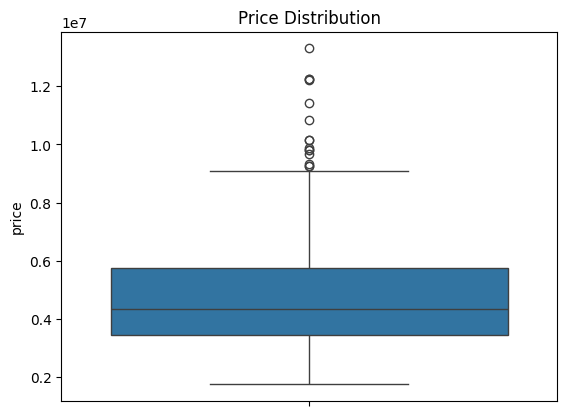

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['price'])
plt.title("Price Distribution")
plt.show()


 # Step 4:Data Preprocessing

In this step, we prepare the raw dataset for training a machine learning model. Below are the key preprocessing actions performed:

---

 **Drop Duplicates / Handle Missing Values**

- Duplicate records (if any) are removed to avoid bias and redundancy.
- Missing (null) values are identified and either filled (imputed) or dropped depending on the context.

---

 **One-Hot Encode Categorical Columns**

- Categorical variables (e.g., `location`, `type`) are converted into numerical format using **One-Hot Encoding**.
- This helps machine learning models understand non-numeric features.

---

 **Separate Features & Target**

- The dataset is split into:
  - **Features (`X`)**: All independent variables used for prediction.
  - **Target (`y`)**: The dependent variable we want to predict (e.g., `price_log`).

---

 **Train-Test Split**

- The dataset is divided into two sets:
  - **Training Set (80%)**: Used to train the model.
  - **Testing Set (20%)**: Used to evaluate the model’s performance on unseen data.

---

**Feature Scaling**

- Feature values are standardized using **StandardScaler**, which scales the data to have:
  - Mean = 0  
  - Standard Deviation = 1
- Scaling ensures that all features contribute equally to the model.


 **4.1: Drop Duplicates / Handle Missing**



In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [ ]:
import numpy as np

df['price_log'] = np.log1p(df['price'])


**4.2: One-Hot Encode Categorical Columns**

In [ ]:
X = df.drop(['price', 'price_log'], axis=1)
X_encoded = pd.get_dummies(X, drop_first=True)


**4.3: Separate Features & Target**

In [ ]:
X = X_encoded  # Use encoded features
y = df['price_log']


**4.4: Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**4.5: Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 5: Build Neural Network Model


We use a **Sequential** model with the following layers:

- `Dense(256, activation='relu')`  
  → First hidden layer with 256 neurons and ReLU activation.
  
- `Dense(128, activation='relu')`  
  → Second hidden layer with 128 neurons and ReLU activation.
  
- `Dense(64, activation='relu')`  
  → Third hidden layer with 64 neurons and ReLU activation.

- `Dense(32, activation='relu')`  
  → Fourth hidden layer with 32 neurons and ReLU activation.

- `Dense(1)`  
  → Output layer with 1 neuron for regression output (predicting house price).

---

# Compile the Model

- `optimizer='adam'` → Adaptive optimizer for efficient training.
- `loss='mse'` → Mean Squared Error is used as the loss function, appropriate for regression tasks.

In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_scaled, y_train, epochs=300, batch_size=32)


Epoch 1/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 202.2976   
Epoch 2/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.0792 
Epoch 3/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.9552 
Epoch 4/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4924 
Epoch 5/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4213 
Epoch 6/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7813 
Epoch 7/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2836 
Epoch 8/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2568 
Epoch 9/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0818 
Epoch 10/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1115 
Epoch 11/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0226 
Epoch 12/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0970 
Epoch 13/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7660 
Epoch 14/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7975 
Epoch 15/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

# Step 6: Train the Model

- **Imported LinearRegression** from `sklearn.linear_model`.
- **Initialized** the model.
- **Trained** the model using the training features and labels.


In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

# Predict on Test Data


*  
We use the trained model to predict **house prices** on the test set.

*  
Since the target variable (price) was transformed using l**og1p** earlier, we reverse this transformation using **expm1**
*   
This step converts both predicted and actual prices back to their original scale for proper evaluation.






In [ ]:
y_pred_log = model.predict(X_test_scaled)
y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)


# Step 7: Evaluation Metric


*  **Mean Absolute Error (MAE)**: Measures the average absolute difference between predicted and actual house prices.

* **Root Mean Squared Error (RMSE)**: Penalizes larger errors more than MAE by squaring the differences before averaging and taking the square root.


* **R² Score**: Indicates how well the model explains the variability of the target variable. A score closer to 1 means better prediction performance.


   
   



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
r2 = r2_score(y_test_actual, y_pred_actual)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 960123.1734346999
RMSE: 1314648.1954137264
R² Score: 0.6580718451881689


#  Visualizing Price Distribution Using Boxplot

- This code plots a **boxplot** of the `price` column from the dataset.
- The purpose of this plot is to:
  - Identify the **distribution** of house prices,
  - Detect any **outliers** or unusually high/low prices,
  - Understand the **central tendency** (like median) and **spread** of the data.

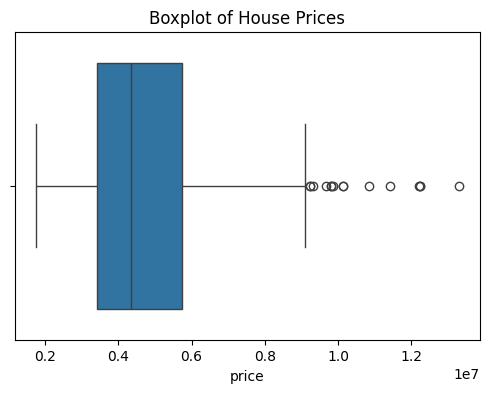

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Housing.csv")


plt.figure(figsize=(6, 4))
sns.boxplot(x=df['price'])
plt.title("Boxplot of House Prices")
plt.show()


# Task 2
# Step 1: Import Libraries

###  Data Manipulation & Visualization
- **pandas** – For loading and handling structured data.
- **numpy** – For numerical computations and array operations.
- **matplotlib.pyplot** & **seaborn** – For creating visualizations and plots (e.g., heatmaps, graphs).

###  Scikit-learn (sklearn)
- **train_test_split** – To split the dataset into training and testing sets.
- **StandardScaler** – To normalize feature values.
- **LabelEncoder** – To convert categorical variables into numeric format.
- **accuracy_score**, `f1_score`, `roc_auc_score` – For evaluating model performance.
- **confusion_matrix**, `classification_report`, `RocCurveDisplay` – For detailed classification evaluation.

###  imbalanced-learn
- **SMOTE** – Synthetic Minority Oversampling Technique to balance the dataset by oversampling the minority class.

###  TensorFlow / Keras
- **Sequential** – To build a linear stack of neural network layers.
- **Dense** – To create fully connected (dense) layers in the neural network.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Step 2: Load the Dataset


*   **pd.read_csv()** reads the uploaded CSV file into a DataFrame named df.
*   **df.head()** displays the first 5 rows to verify the data has been loaded correctly.




In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Churn_Modelling.csv to Churn_Modelling (2).csv


In [ ]:
import pandas as pd
df = pd.read_csv("Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Step 3: Preprocess the Data
This step involves cleaning and transforming the dataset to prepare it for machine learning.

###  Drop Unnecessary Columns
- Columns such as `'RowNumber'`, `'CustomerId'`, and `'Surname'` (if they exist) are dropped.
- These columns are identifiers and do not contribute to predicting customer churn.

###  Encode Categorical Variables
- **Gender**: Encoded using `LabelEncoder`:
  - Male → 1
  - Female → 0
- **Geography**: One-hot encoded to convert text into numeric format.
  - Drops one dummy variable to avoid multicollinearity (`drop_first=True`).

###  Define Features and Target
- **Target column**: `'Exited'` (1 = churned, 0 = not churned)
- **Feature set (X)**: All remaining columns after dropping the target.



In [ ]:
print(df.columns)


Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')


In [ ]:

columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])


if 'Gender' in df.columns:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0


if 'Geography' in df.columns:
    df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


target_column = 'Exited' if 'Exited' in df.columns else df.columns[-1]
X = df.drop(target_column, axis=1)
y = df[target_column]


# Step 4: Handle Imbalanced Data with SMOTE

The dataset is imbalanced, meaning one class (non-churned customers) has significantly more samples than the other (churned customers). This can negatively impact model performance.

###  SMOTE (Synthetic Minority Over-sampling Technique)
- **SMOTE** generates synthetic samples for the minority class by interpolating between existing examples.
- It helps to **balance the dataset** without duplicating existing data.

###  What This Step Does:
- Uses `SMOTE` to create a **balanced dataset** by increasing the number of churned samples.
- Prints class distributions **before and after SMOTE** for verification.

In [ ]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_resampled.value_counts())


Before SMOTE: Exited
0    7963
1    2037
Name: count, dtype: int64
After SMOTE: Exited
1    7963
0    7963
Name: count, dtype: int64


# Step 5: Train-Test Split and Feature Scaling
### Train-Test Split
- The dataset is split into:
  - **Training Set**: 80% of the data
  - **Testing Set**: 20% of the data
- `random_state=42` ensures reproducibility of the split.

###  Feature Scaling
- **StandardScaler** is used to normalize feature values.
- It transforms the features to have:
  - **Mean = 0**
  - **Standard Deviation = 1**
- This step is essential for neural networks, as it improves model convergence and stability.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 # Step 6: Build and Train the Neural Network
 ### Model Architecture:
- **Input Layer**: Matches the number of features in the dataset.
- **Hidden Layers**:
  - First Dense Layer: 64 neurons, ReLU activation.
  - Second Dense Layer: 32 neurons, ReLU activation.
  - Third Dense Layer: 16 neurons, ReLU activation.
- **Output Layer**:
  - 1 neuron with **sigmoid** activation for binary classification (churn or not churn).

###  Compilation:
- **Optimizer**: `adam` – adaptive optimizer for fast convergence.
- **Loss Function**: `binary_crossentropy` – suitable for binary classification tasks.
- **Metric**: `accuracy` – to monitor performance during training.

###  Training:
- The model is trained for **100 epochs** with a **batch size of 16**.
- **Validation Split**: 20% of training data is used for validation to monitor overfitting.
- **Verbose=1**: Displays real-time training progress.

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7557 - loss: 0.5030 - val_accuracy: 0.8265 - val_loss: 0.3822
Epoch 2/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8332 - loss: 0.3781 - val_accuracy: 0.8308 - val_loss: 0.3653
Epoch 3/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8361 - loss: 0.3631 - val_accuracy: 0.8328 - val_loss: 0.3638
Epoch 4/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8548 - loss: 0.3446 - val_accuracy: 0.8363 - val_loss: 0.3596
Epoch 5/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8485 - loss: 0.3450 - val_accuracy: 0.8320 - val_loss: 0.3619
Epoch 6/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8471 - loss: 0.3439 - val_accuracy: 0.8348 - val_loss: 0.3593
Epoch 7/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8479 - loss: 0.3437 - val_accuracy: 0.8367 - val_loss: 0.3623
Epoch 8/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8504 - loss: 0.3400 - val_accu

#  Step 7: Model Evaluation using Metrics

In this step, we evaluate the trained neural network model on the test dataset using key classification metrics:

###  Accuracy
- Measures the overall percentage of correct predictions.
- Gives a basic idea of how well the model is performing.

###  F1 Score
- The harmonic mean of **precision** and **recall**.
- Especially useful for imbalanced datasets, where accuracy alone can be misleading.
- A high **F1 Score** means the model has a good balance between false positives and false negatives.

###  AUC (Area Under the ROC Curve)
- Measures the model’s ability to distinguish between the classes (churned vs. not churned).
- AUC values close to **1.0** indicate excellent separability, while 0.5 means random guessing.


In [44]:
# Predict
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_probs)

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy: 0.8449
F1 Score: 0.8425
AUC Score: 0.9141



#  Step 8: Evaluation – Confusion Matrix, Classification Report, and ROC Curve

In this step, we evaluate the performance of the trained neural network model using key visual and statistical tools:

###  Confusion Matrix
- The **confusion matrix** shows the number of correct and incorrect predictions made by the classifier.
- It helps understand how well the model distinguishes between churned and non-churned customers.

###  Classification Report
- Provides detailed metrics including:
  - **Precision**: How many predicted churns were actually correct?
  - **Recall**: How many actual churns were correctly predicted?
  - **F1-Score**: Harmonic mean of precision and recall.
- Useful for evaluating class-wise performance, especially in imbalanced datasets.

###  ROC Curve
- The **Receiver Operating Characteristic (ROC)** curve illustrates the model’s ability to distinguish between the classes.
- AUC (Area Under the Curve) close to **1.0** indicates strong performance.

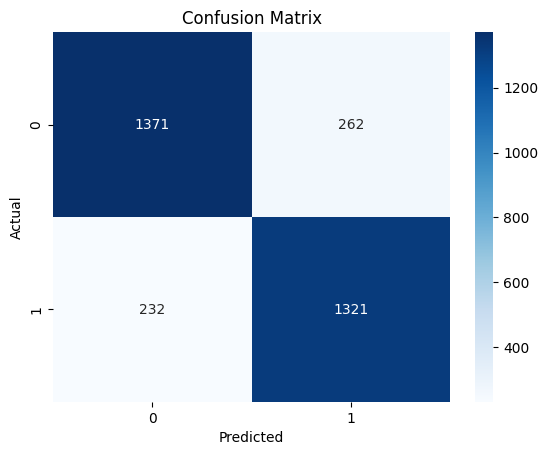

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1633
           1       0.83      0.85      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.85      0.84      3186
weighted avg       0.85      0.84      0.84      3186



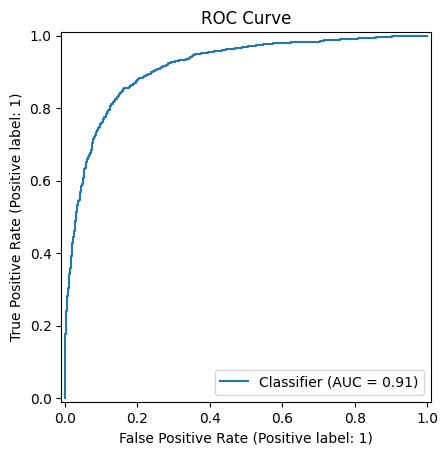

In [45]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


print(classification_report(y_test, y_pred))


from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_probs)
plt.title("ROC Curve")
plt.show()
